## Bibliotecas

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

## Convertendo arquivos para .csv

In [3]:
# !libreoffice --convert-to csv '30.xlsx' --outdir 'data'
# !libreoffice --convert-to csv '35.xlsx' --outdir 'data'
# !libreoffice --convert-to csv '40.xlsx' --outdir 'data'
# !libreoffice --convert-to csv '43.xlsx' --outdir 'data'
# !libreoffice --convert-to csv '45.xlsx' --outdir 'data'
# !libreoffice --convert-to csv '48.xlsx' --outdir 'data'
# !libreoffice --convert-to csv '50.xlsx' --outdir 'data'
# !libreoffice --convert-to csv '55.xlsx' --outdir 'data'
# !libreoffice --convert-to csv '60.xlsx' --outdir 'data'

# !libreoffice --convert-to csv '33.xlsx' --outdir 'data'
# !libreoffice --convert-to csv '38.xlsx' --outdir 'data'
# !libreoffice --convert-to csv '48.xlsx' --outdir 'data'
# !libreoffice --convert-to csv '53.xlsx' --outdir 'data'
# !libreoffice --convert-to csv '58.xlsx' --outdir 'data'

convert /home/enacom/Documentos/github/smart-automation/ava02/pt2/43.xlsx as a Calc document -> /home/enacom/Documentos/github/smart-automation/ava02/pt2/data/43.csv using filter : Text - txt - csv (StarCalc)
convert /home/enacom/Documentos/github/smart-automation/ava02/pt2/48.xlsx as a Calc document -> /home/enacom/Documentos/github/smart-automation/ava02/pt2/data/48.csv using filter : Text - txt - csv (StarCalc)
Overwriting: /home/enacom/Documentos/github/smart-automation/ava02/pt2/data/48.csv


## Selecionando columas

In [2]:
pd.read_csv('data/40.csv', nrows=10)

,Time,Frequencia CMB,Untitled 1,CV-1,CV-2,CV-3,PT-1,PT-2,PT-3,PT-4,PT-5,FT-1,FT-2,Untitled 12
0,20/03/2024 10:27:28,40,0,"0,470337","0,762953","-0,48845","-0,959312","6,7685","4,127013","3,088004","2,957511","-8,666009","0,854935","4776,152026"
1,20/03/2024 10:27:39,40,0,"0,570225","0,726562","-0,488919","-0,978319","6,831372","4,130334","3,08363","2,954814","-8,666426","0,83519","3714,221286"
2,20/03/2024 10:27:39,40,0,"0,554181","0,72286","-0,527851","-0,982727","6,713282","4,266902","3,08736","2,978202","-8,627386","0,821449","4445,362329"
3,20/03/2024 10:27:39,40,0,"0,531041","0,756494","-0,384082","-0,979589","6,693312","4,160506","3,098314","2,935437","-8,666908","0,873331","4016,488828"
4,20/03/2024 10:27:39,40,0,"0,558501","0,721757","-0,495407","-0,986853","6,811103","4,149884","3,084715","2,955347","-8,662092","0,844244","4551,789779"
5,20/03/2024 10:27:39,40,0,"0,546545","0,721442","-0,335533","-0,974123","6,763474","4,147738","3,09438","2,941861","-8,669893","0,840744","3796,201843"
6,20/03/2024 10:27:40,40,0,"0,546468","0,776895","-0,315911","-0,985654","6,80814","4,186525","3,084647","2,958576","-8,670921","0,794769","3762,207546"
7,20/03/2024 10:27:40,40,0,"0,583723","0,714983","-0,437321","-0,967599","6,823917","4,24199","3,089836","2,968832","-8,669123","0,857182","4605,415734"
8,20/03/2024 10:27:40,40,0,"0,54184","0,739243","-0,419497","-0,975533","6,802083","4,147808","3,090785","2,953075","-8,664853","0,848032","4818,066137"
9,20/03/2024 10:27:40,40,0,"0,547856","0,701198","-0,443888","-0,994223","6,79749","4,068573","3,093193","2,976285","-8,64803","0,836827","3560,200111"


In [3]:
cols = list(pd.read_csv('data/40.csv', nrows=10).columns)
# del cols[2] #  = "Angulo CV-1"
# cols[-1] = "desconhecida"
# del cols[0]
cols

['Time',
 'Frequencia CMB',
 'Untitled 1',
 'CV-1',
 'CV-2',
 'CV-3',
 'PT-1',
 'PT-2',
 'PT-3',
 'PT-4',
 'PT-5',
 'FT-1',
 'FT-2',
 'Untitled 12']

In [4]:
num_lines_per_file = list()
for file in os.listdir('data'):
    if file.endswith('.csv'):
        try:
            df = pd.read_csv(f'./data/{file}')
            print(f"Arquivo: {file} | Linhas: {len(df)}")
            num_lines_per_file.append(len(df))
        except:
            print(f"Erro ao abrir o arquivo {file}")
    # else:
    #     os.remove(f'./data/{file}')

avg_lines_per_file = sum(num_lines_per_file)/len(num_lines_per_file)

print(f"Número médio de linhas: {avg_lines_per_file}")
print(f'Min: {min(num_lines_per_file)}')

Arquivo: 50.csv | Linhas: 2064
Arquivo: 33.csv | Linhas: 1753
Arquivo: 55.csv | Linhas: 1983
Arquivo: 48.csv | Linhas: 2063
Arquivo: 60.csv | Linhas: 1963
Arquivo: 43.csv | Linhas: 2051
Arquivo: 35.csv | Linhas: 2105
Arquivo: 38.csv | Linhas: 2048
Arquivo: 40.csv | Linhas: 2087
Arquivo: 53.csv | Linhas: 2035
Arquivo: 58.csv | Linhas: 2010
Arquivo: 30.csv | Linhas: 2162
Número médio de linhas: 2027.0
Min: 1753


## Reamostrando os arquivos para o intervalo de 1s
___

Nesta etapa, tentei padronizar o tamanho dos arquivos para que o conjunto de dados fosse o mais uniforme possivel.

In [5]:
os.makedirs('./data/1s', exist_ok=True)

for file in os.listdir('data'):
    if file.endswith('.csv'):
        try:
            df = pd.read_csv(
                f'./data/{file}', 
                skiprows=3,
                nrows=avg_lines_per_file,
                sep=',',
                decimal=',',
                names=cols
            )
            df.index = pd.to_datetime(df['Time'].apply(lambda x: x[:len('2023-04-18 02:59:55')]))
            # df.columns = cols          
            df.drop(columns=['Time', 'Untitled 1', 'Untitled 12'], inplace=True)
            df = df.astype(np.float16)
            df = df.resample('1s').mean()
            print(f"Arquivo: {file} | Linhas: {len(df)}")
            
            df.dropna(inplace=True)
            df.to_csv(f'./data/1s/{file.split('.')[0]}_1s.csv', index=True)
            
        except Exception as e:
            print(e)
            print(f"Erro ao abrir o arquivo {file}")

Arquivo: 50.csv | Linhas: 529
Arquivo: 33.csv | Linhas: 420
Arquivo: 55.csv | Linhas: 522
Arquivo: 48.csv | Linhas: 522
Arquivo: 60.csv | Linhas: 516
Arquivo: 43.csv | Linhas: 550
Arquivo: 35.csv | Linhas: 515
Arquivo: 38.csv | Linhas: 3542402
Arquivo: 40.csv | Linhas: 532
Arquivo: 53.csv | Linhas: 543
Arquivo: 58.csv | Linhas: 542
Arquivo: 30.csv | Linhas: 512


In [6]:
def create_fig(
    data: pd.DataFrame,
    cols: list[str],
    save: bool = True,
    filepath: str = './images/'
) -> None:
    
    freq = data['Frequencia CMB'].values[0]
    
    fig, ax = plt.subplots(1,1, figsize=(12,5))
    
    for col in cols:
        ax.plot(data[[col]], label=col, linewidth=2)
    
    ax.set_xlabel('Tempo (s)')
    ax.set_title(f'Grandezas medidas para frequência de {freq} Hz.')
    ax.grid()
    ax.legend()
    plt.tight_layout()
    
    if save:
        plt.savefig(
            fname=filepath + (f'{freq}_cvs.png' if len(cols) == 1 else f'{freq}_fts.png' if len(cols) == 2 else f'{freq}_pts.png'),
            dpi=300,
            format='png'
        )

## Gerando imagens do comportamento das pressoes e vazoes para cada frequencia da bomba

Arquivo: 40_1s.csv | Linhas: 532
Arquivo: 53_1s.csv | Linhas: 543
Arquivo: 48_1s.csv | Linhas: 522
Arquivo: 38_1s.csv | Linhas: 546
Arquivo: 30_1s.csv | Linhas: 512
Arquivo: 55_1s.csv | Linhas: 522
Arquivo: 33_1s.csv | Linhas: 420
Arquivo: 35_1s.csv | Linhas: 515
Arquivo: 43_1s.csv | Linhas: 542
Arquivo: 58_1s.csv | Linhas: 542
Arquivo: 60_1s.csv | Linhas: 516


/tmp/ipykernel_408972/3992923437.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,1, figsize=(12,5))


Arquivo: 50_1s.csv | Linhas: 529


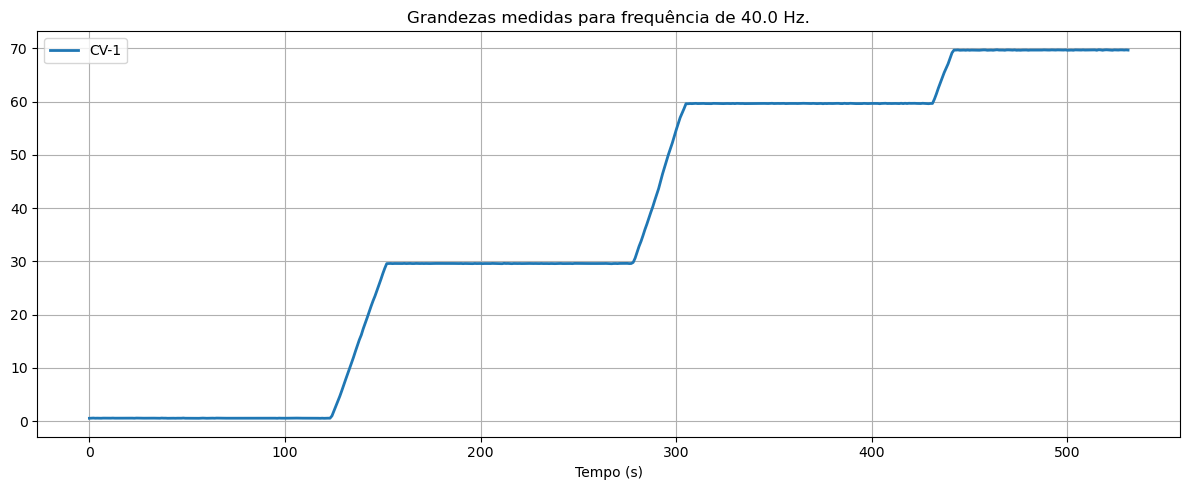

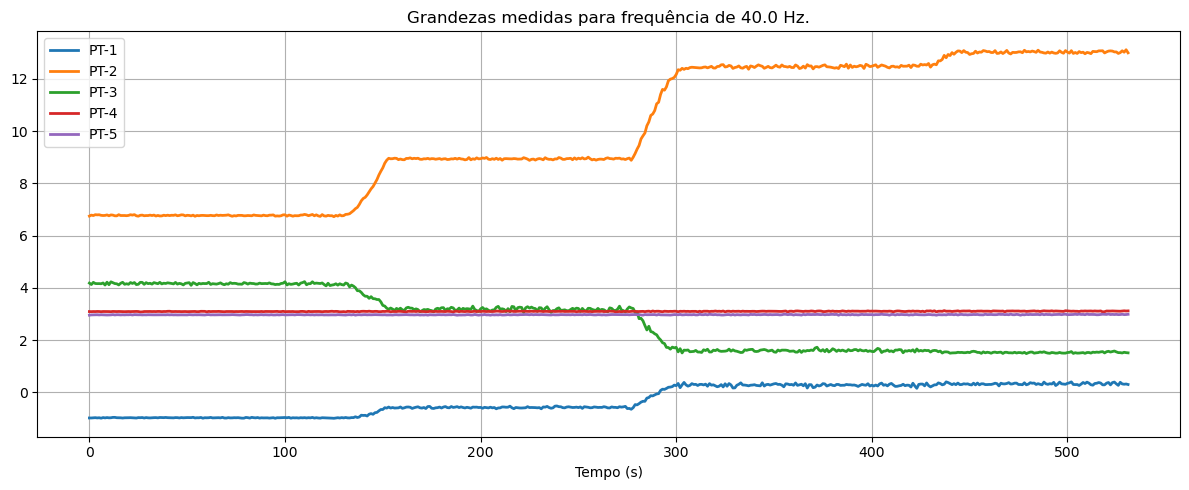

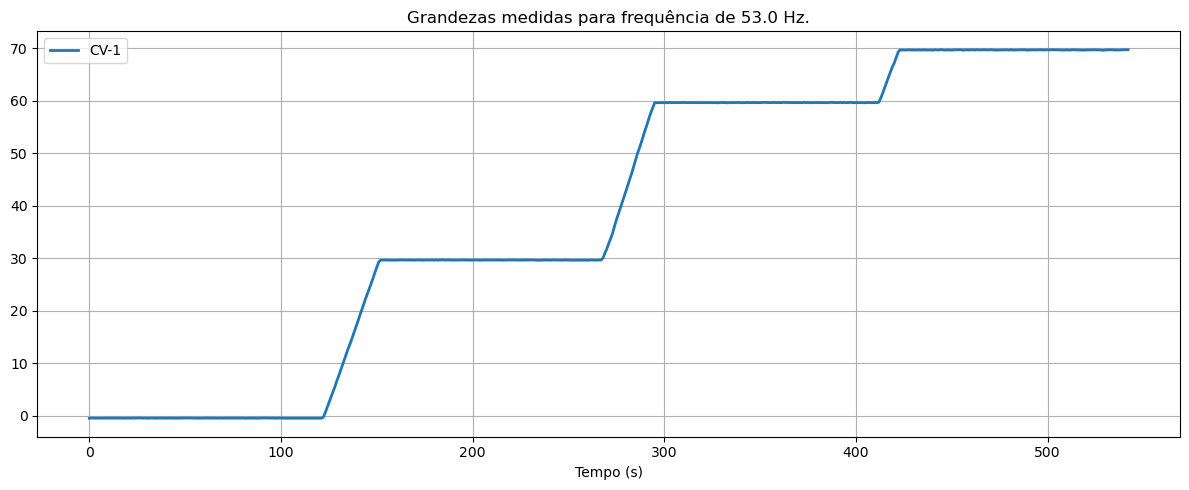

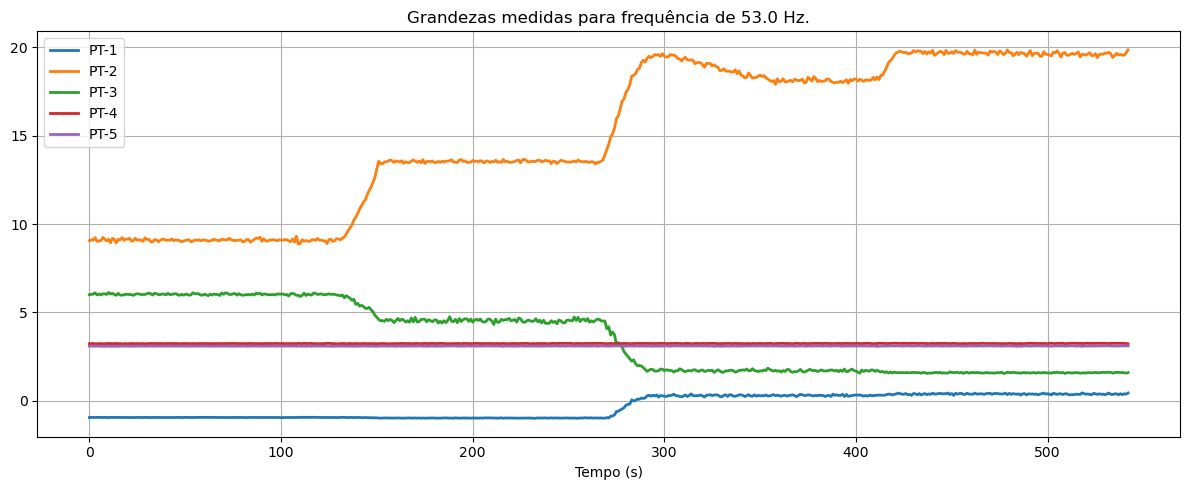

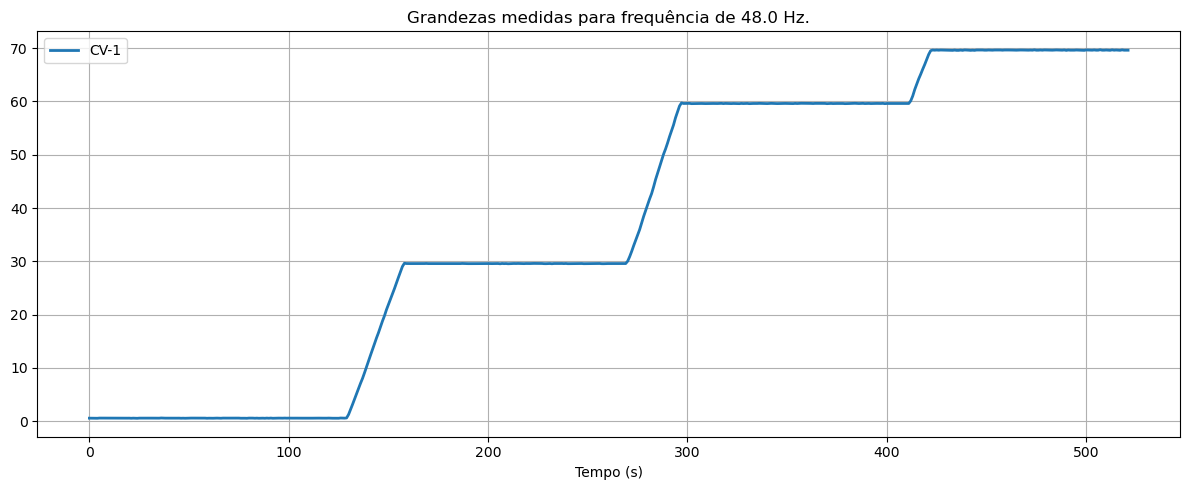

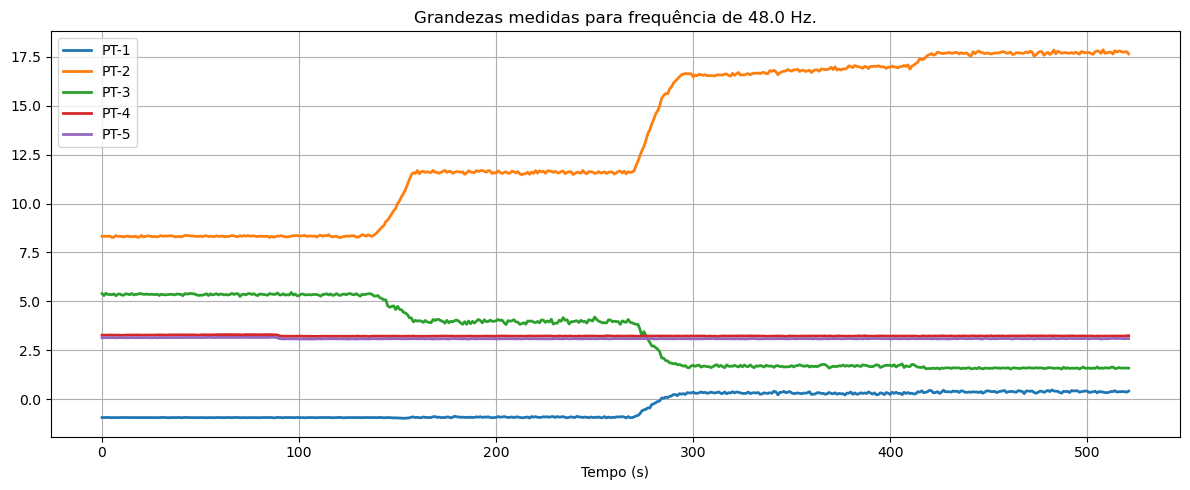

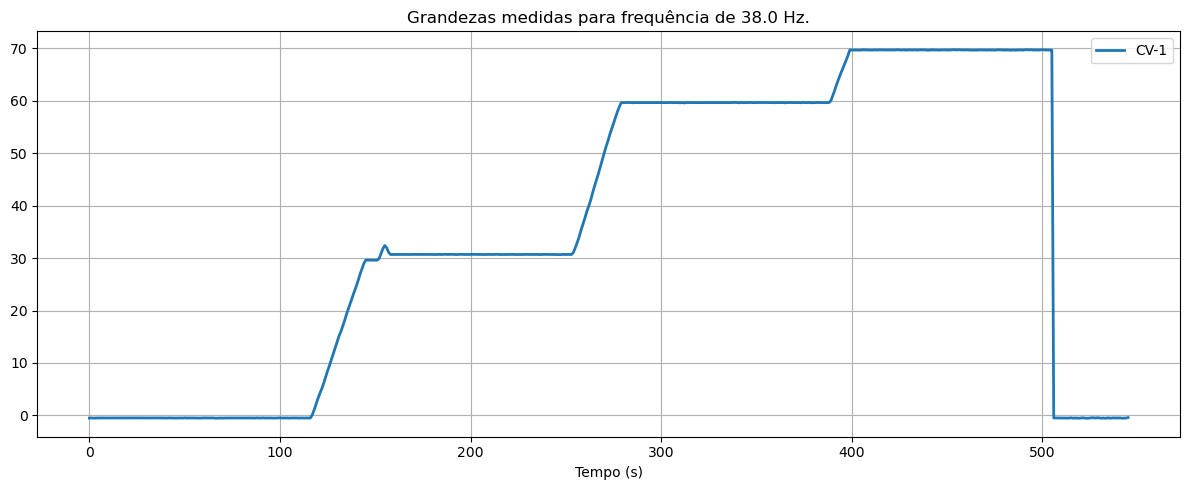

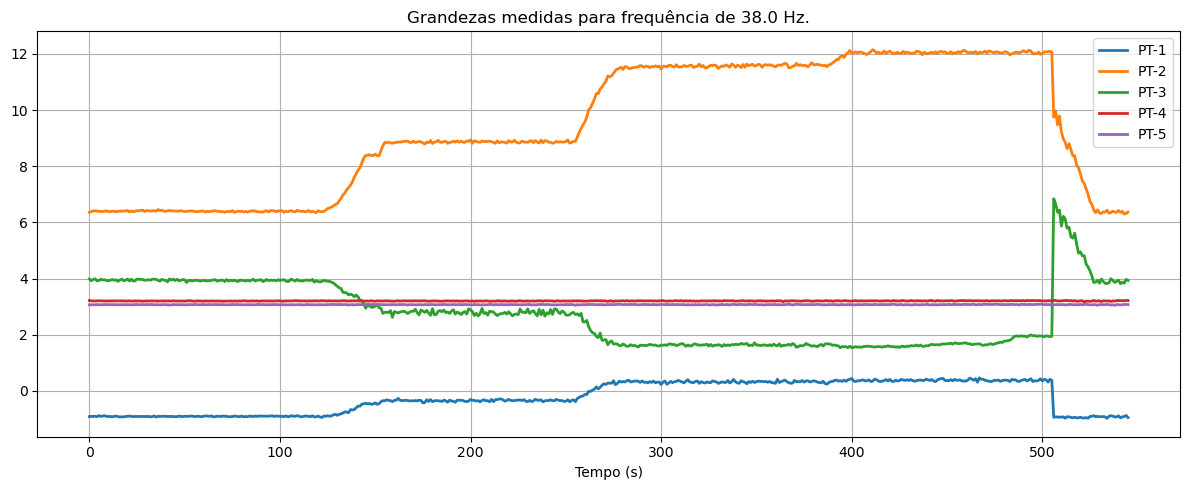

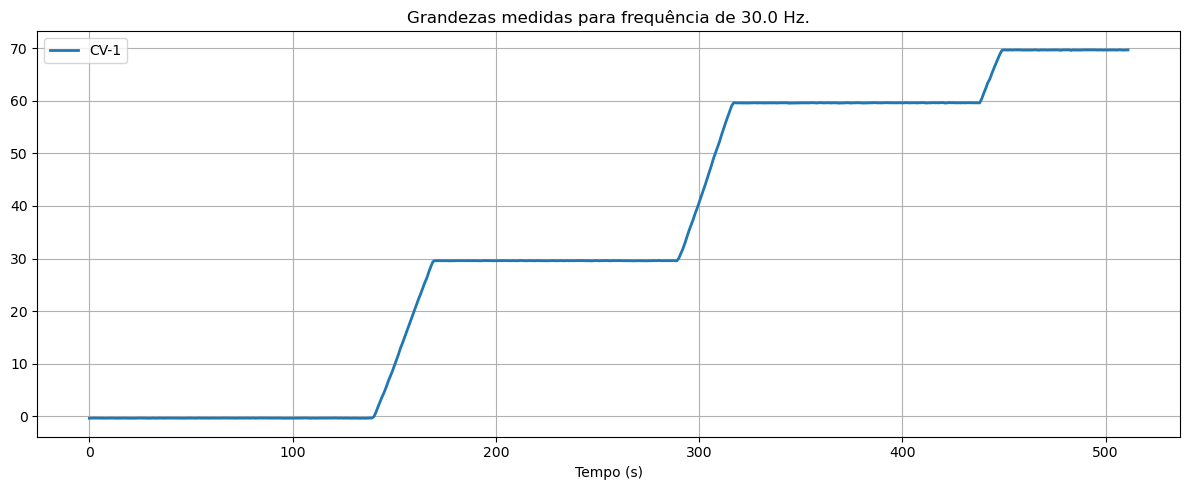

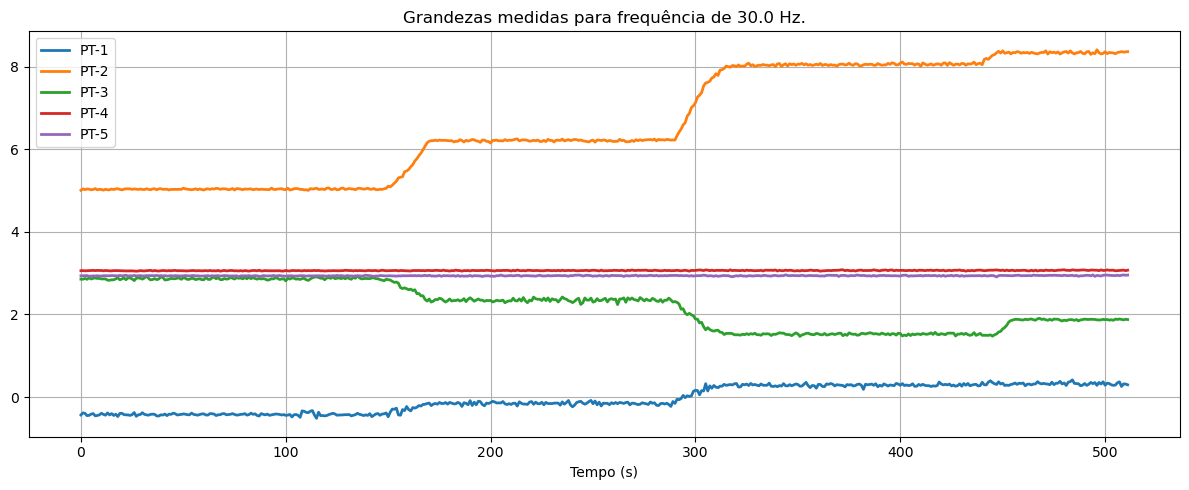

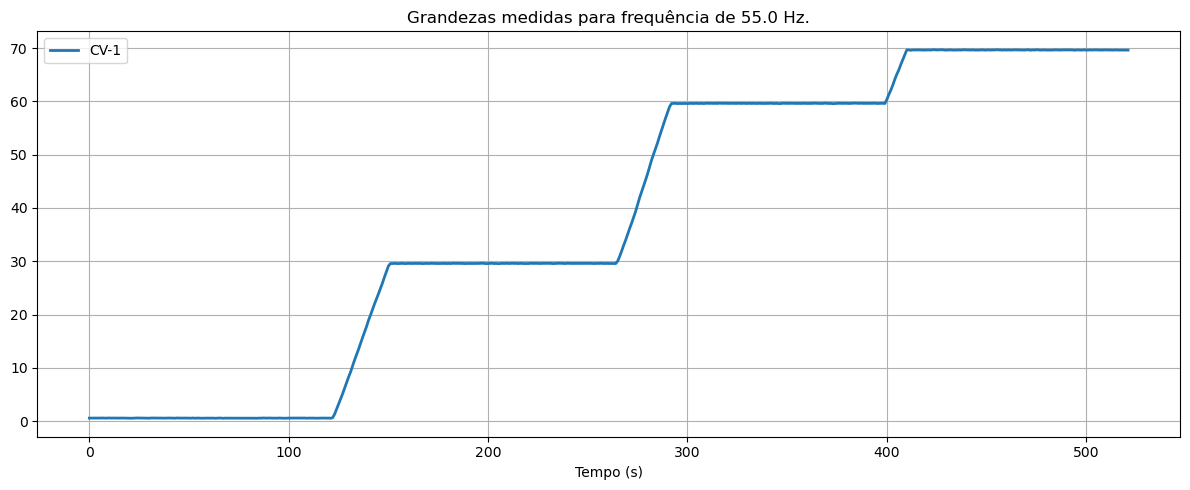

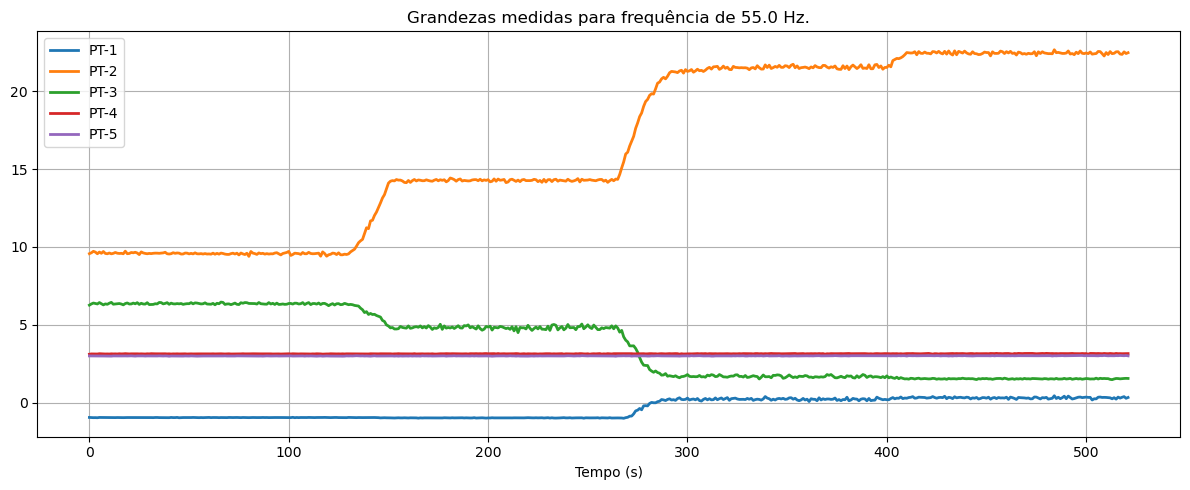

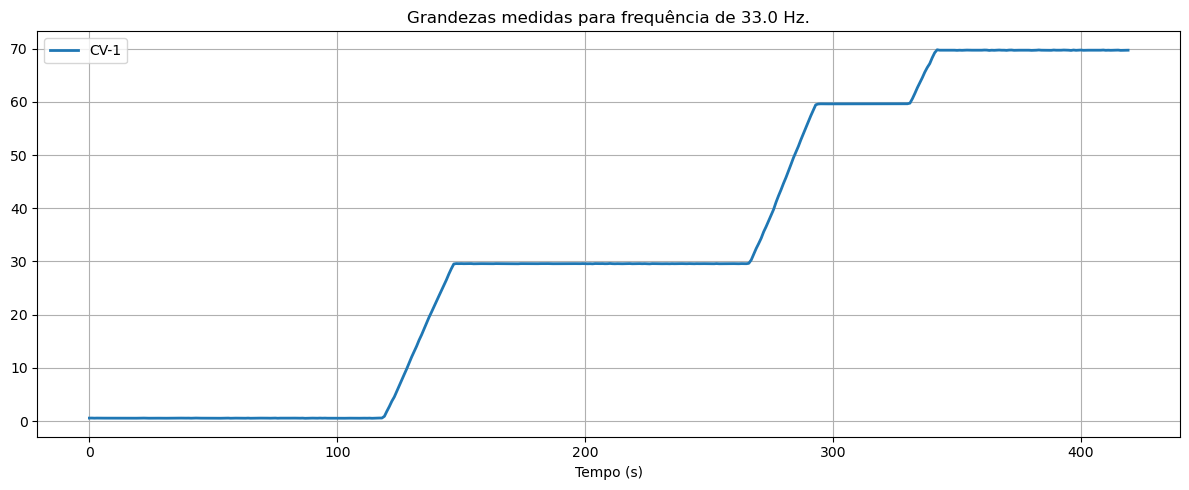

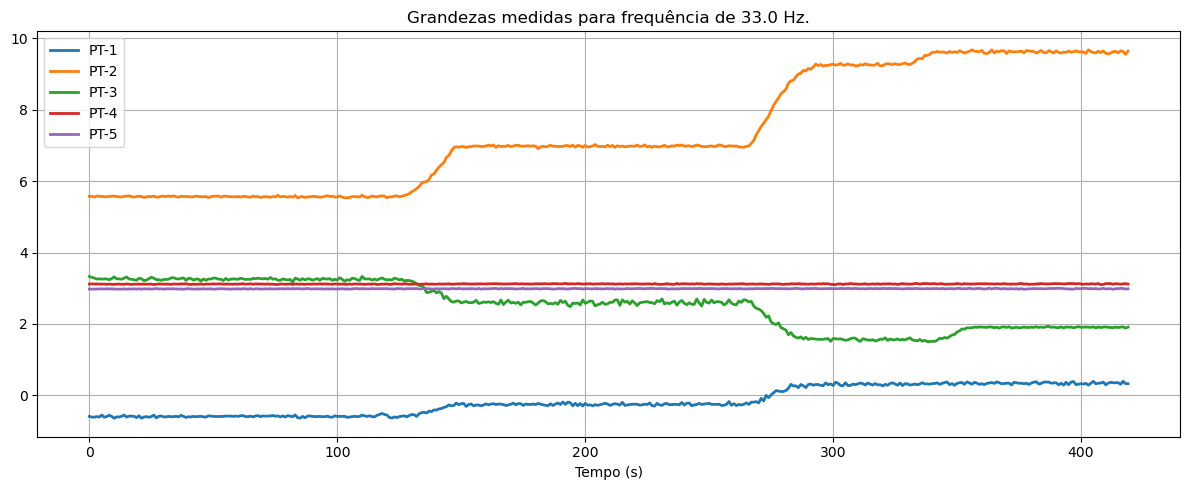

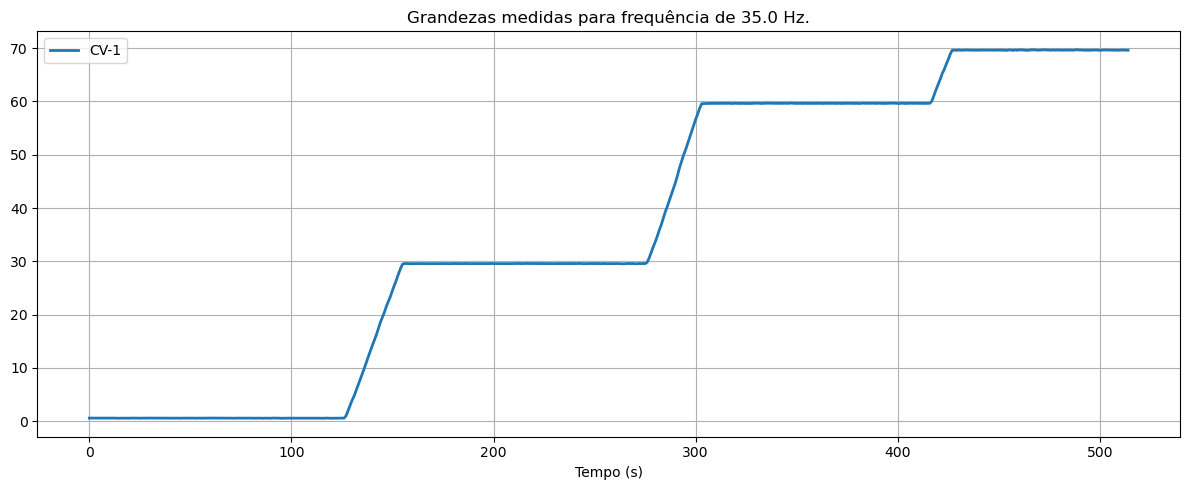

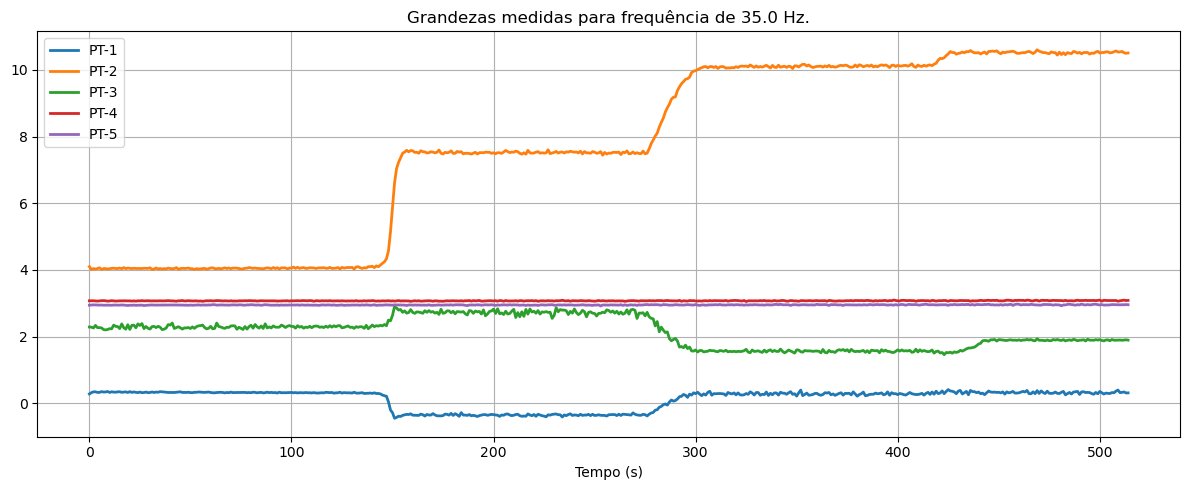

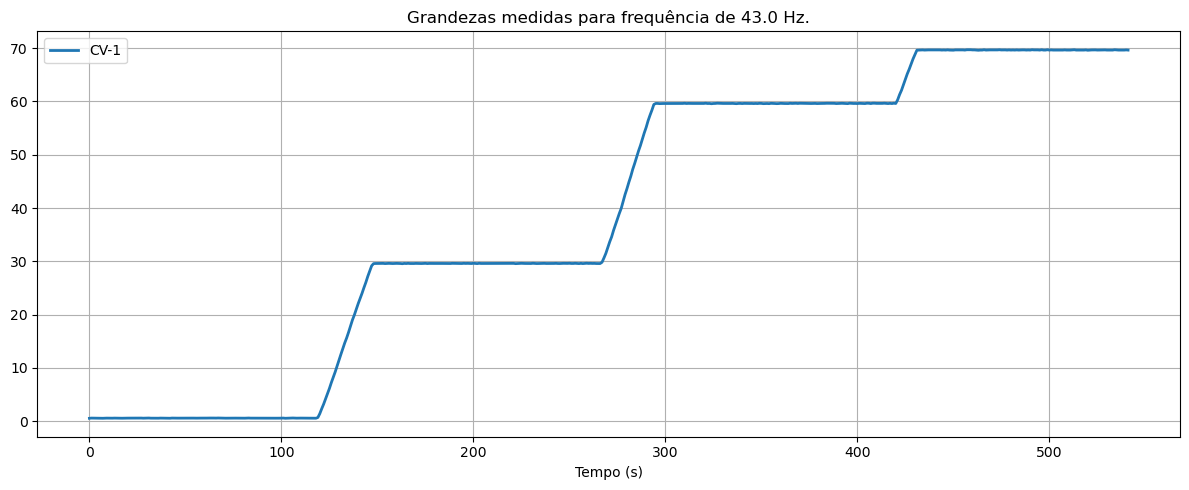

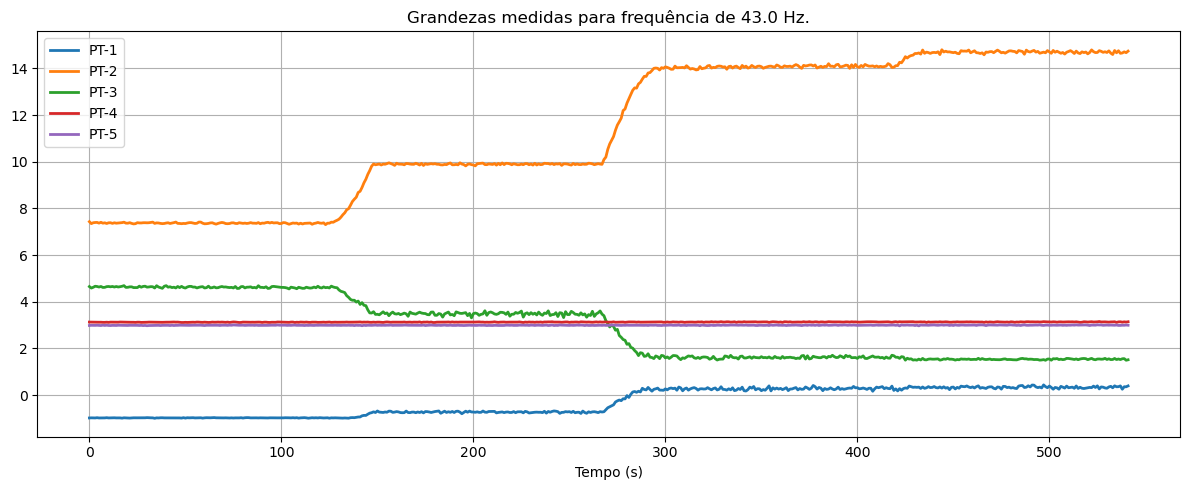

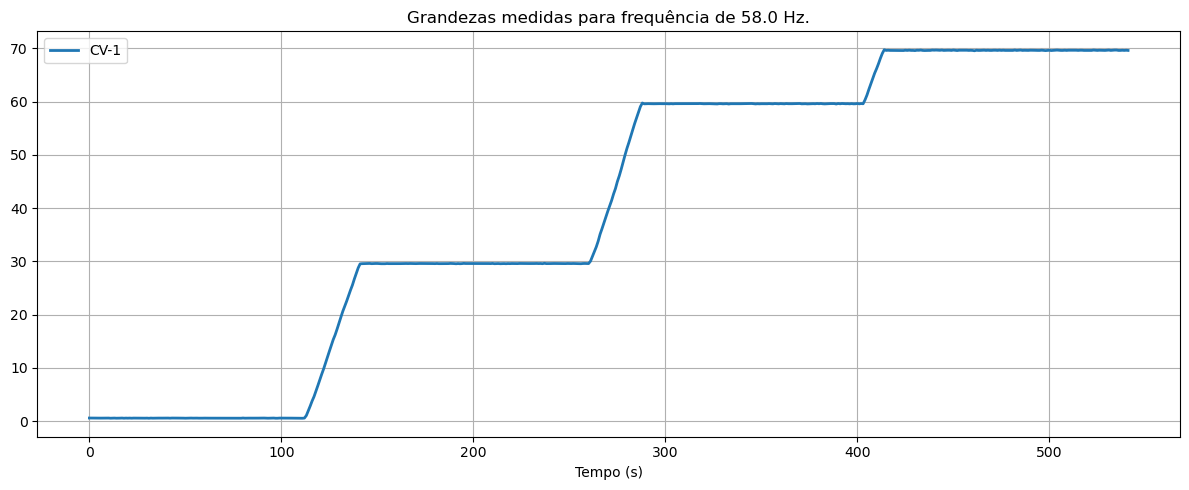

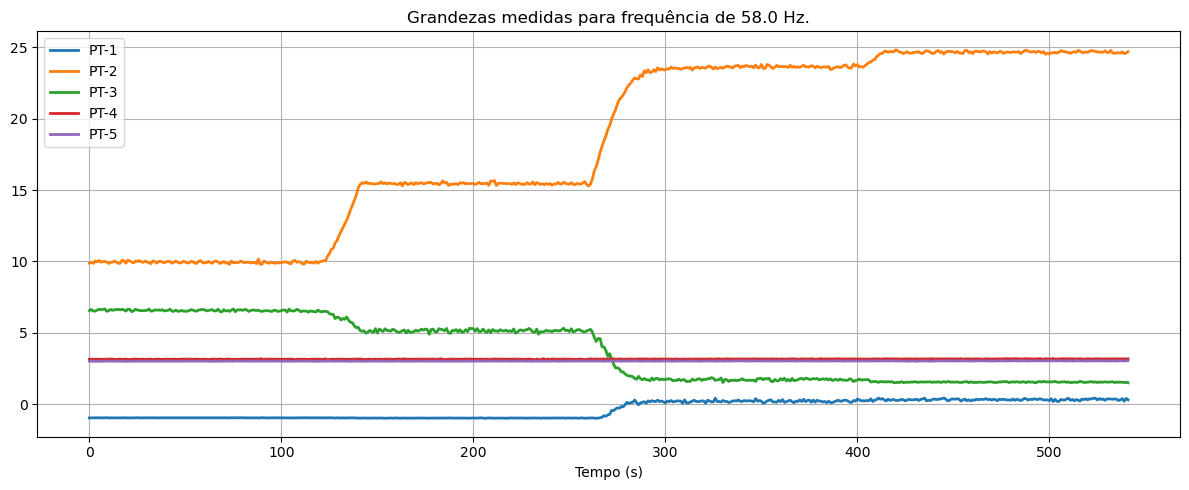

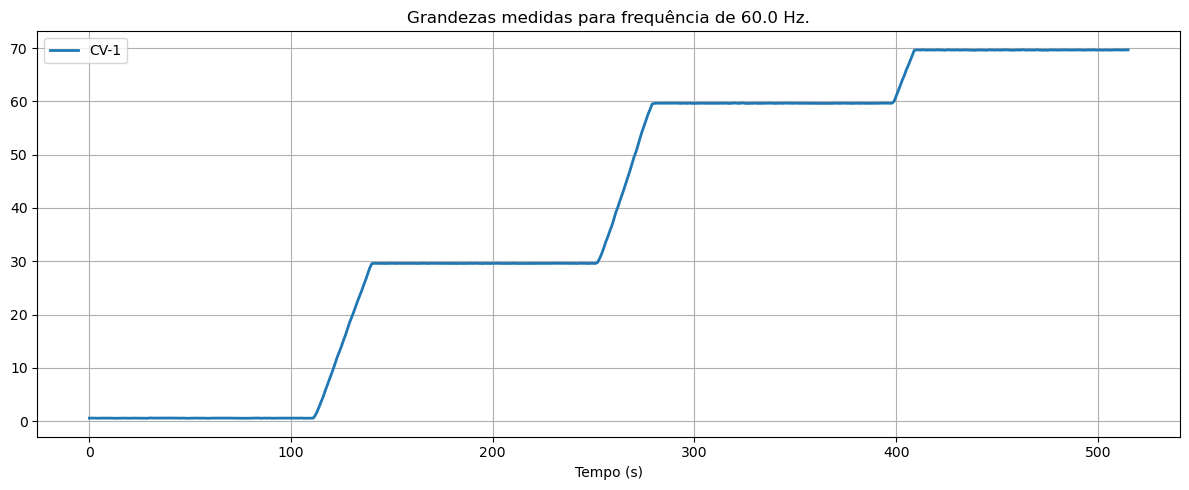

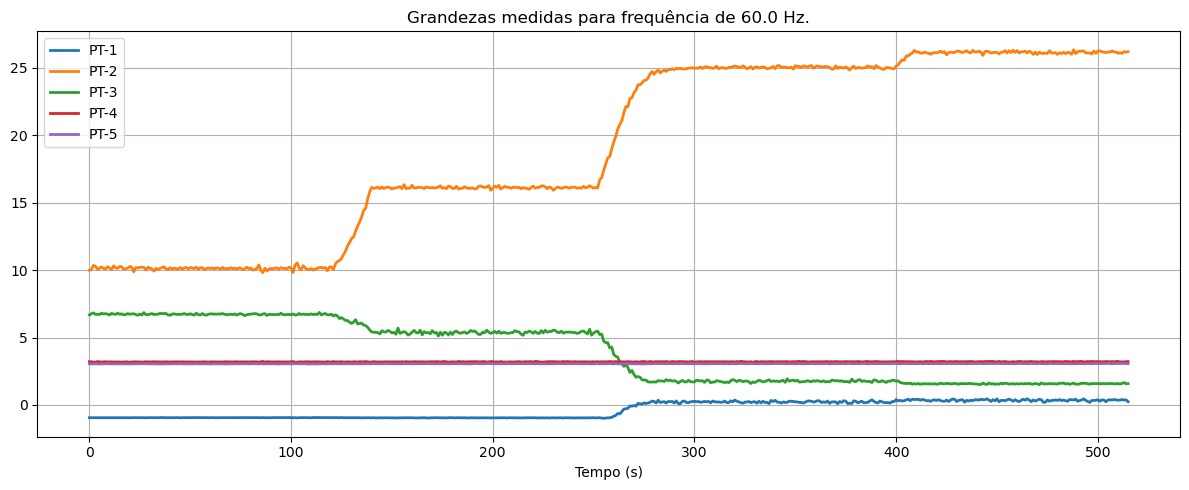

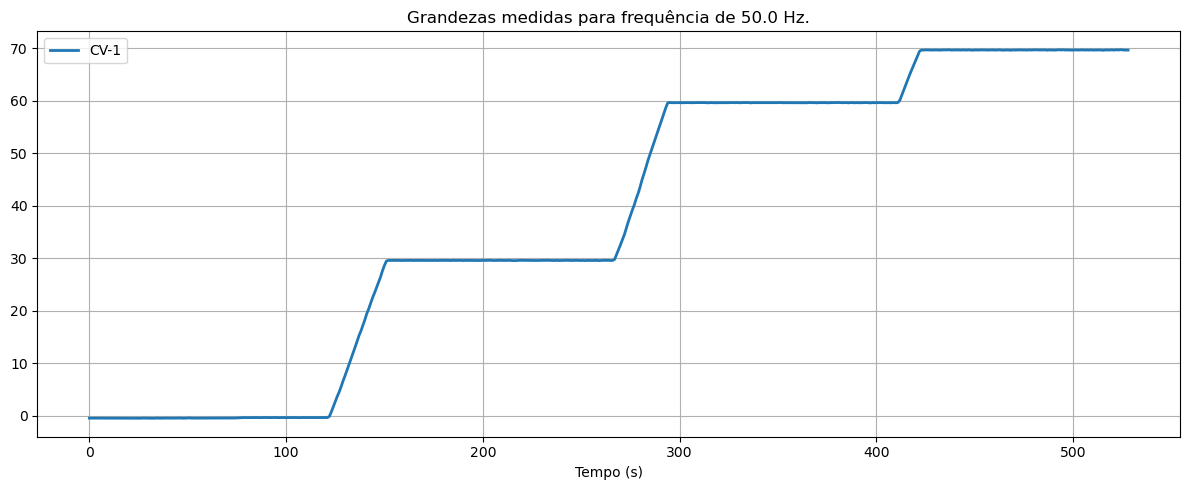

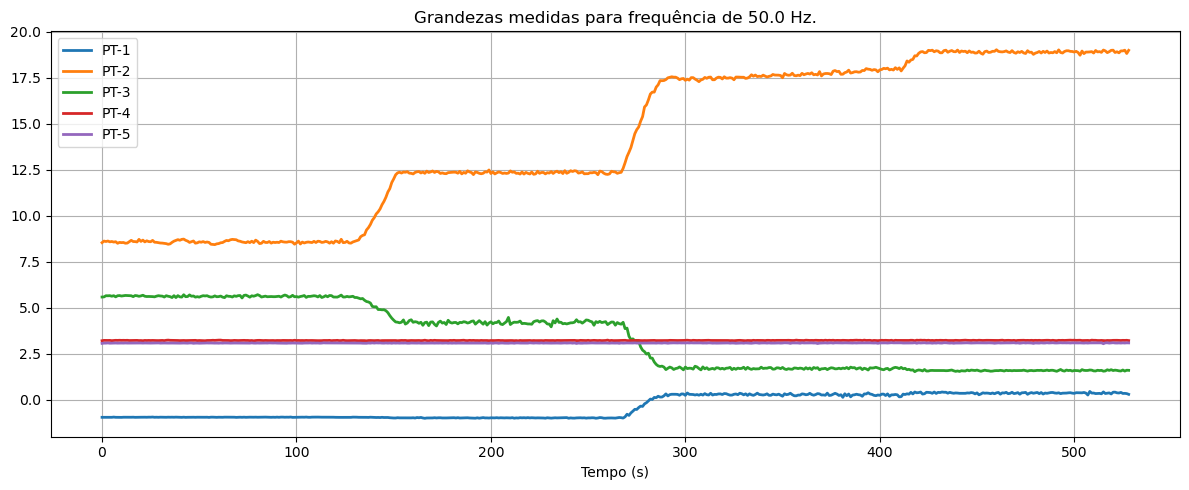

In [7]:
os.makedirs('./images', exist_ok=True)

for file in os.listdir('data/1s'):
    if file.endswith('.csv'):
        try:
            df = pd.read_csv(f'./data/1s/{file}')
            print(f"Arquivo: {file} | Linhas: {len(df)}")
            create_fig(
                df,
                ['CV-1'] #,'CV-2','CV-3'],
                # ['PT-1','PT-2','PT-3','PT-4','PT-5']
                # ['FT-1','FT-2']
            )
            create_fig(
                df,
                # ['CV-1','CV-2','CV-3'],
                ['PT-1','PT-2','PT-3','PT-4','PT-5']
                # ['FT-1','FT-2']
            )
        except:
            print(f"Erro ao abrir o arquivo {file}")

## Conjunto unico para teste e treinamento

In [15]:
train_test_data = pd.DataFrame()

for file in os.listdir('data/1s'):
    if file.endswith('.csv') and file != 'train_test_data.csv':
        try:
            df = pd.read_csv(f'./data/1s/{file}')
            df.reset_index(drop=True, inplace=True)
            df.drop(columns=['Time'], inplace=True)
            print(f"Arquivo: {file} | Linhas: {len(df)}")
            
            train_test_data = pd.concat([train_test_data, df], axis=0)
        except:
            print(f"Erro ao abrir o arquivo {file}")

print(f"Linhas: {len(train_test_data)}")

Arquivo: 40_1s.csv | Linhas: 532
Arquivo: 53_1s.csv | Linhas: 543
Arquivo: 48_1s.csv | Linhas: 522
Arquivo: 38_1s.csv | Linhas: 546
Arquivo: 30_1s.csv | Linhas: 512
Arquivo: 55_1s.csv | Linhas: 522
Arquivo: 33_1s.csv | Linhas: 420
Arquivo: 35_1s.csv | Linhas: 515
Arquivo: 43_1s.csv | Linhas: 542
Arquivo: 58_1s.csv | Linhas: 542
Arquivo: 60_1s.csv | Linhas: 516
Arquivo: 50_1s.csv | Linhas: 529
Linhas: 6241


In [16]:
train_test_data.columns

Index(['Frequencia CMB', 'CV-1', 'CV-2', 'CV-3', 'PT-1', 'PT-2', 'PT-3',
       'PT-4', 'PT-5', 'FT-1', 'FT-2'],
      dtype='object')

In [17]:
train_test_data.drop(
    columns=[
        'CV-2', 'CV-3', 'FT-1', 'FT-2', 'PT-4', 'PT-5'
    ],
    inplace=True
)

In [18]:
train_test_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 6241 entries, 0 to 528
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Frequencia CMB  6241 non-null   float64
 1   CV-1            6241 non-null   float64
 2   PT-1            6241 non-null   float64
 3   PT-2            6241 non-null   float64
 4   PT-3            6241 non-null   float64
dtypes: float64(5)
memory usage: 292.5 KB


In [19]:
train_test_data.to_csv('./data/1s/train_test_data.csv', index=False)
train_test_data.to_parquet('./data/1s/train_test_data.parquet', index=False)

In [ ]:
from dataprep.eda import create_report

In [ ]:
report= create_report(train_test_data)
report.save('./data/1s/train_test_data_report.html')